In [1]:
import numpy as np
from numba import jit
from AFM_sinc import MDR_SLS_sinc
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os
print os.getcwd()

C:\Users\Enrique Alejandro\Desktop\2017 11 15 draft resubmission\SimulationsSciRep\Debug\8kHz


## Cantilever and simulation parameters

In [2]:
A = -1.36e-9  #amplitude of the sinc excitation
R = 10.0e-9  #radius of curvature of the parabolic tip apex
startprint = 0.0
simultime = 1200.0e-6*(20.0/8.0) #total simulation time
fo1 =8.0e3  #cantilever 1st mode resonance frequency
omega = 2.0*np.pi*fo1
period1 = 1.0/fo1  #fundamental period
to =7.0*period1   #centered time of the sinc excitation
fo2 = 6.27*fo1
fo3 = 17.6*fo1
Q1 = 2.0 #cantilever's 1st mode quality factor
Q2 = 8.0
Q3 = 12.0
BW = 2.5*fo1*2.0  #excitation bandwith of sinc function
k_m1 =  0.25 #cantilever's 1st mode stiffness
zb = 3.85e-9  #cantilever equilibrium position
period2 = 1.0/fo2
period3 = 1.0/fo3
dt= period3/1.0e4 #simulation timestep
printstep = period3/100.0 #timestep in the saved time array

## Sample Parameters, SLS-Voigt configuration

In [3]:
nu = 0.3
Gg_v = np.array([1.0e6,10.0e6,100.0e6,1.0e9,10.0e9])/(2*(1+nu)) #Glassy modulus in the Voigt-SLS configuration reported in the grid
tau_v = np.array([0.01/omega, 0.1/omega, 1.0/omega, 10.0/omega, 100.0/omega]) #retardation time reported in simulation grid
G_v = 1.0e-1/(1.2*R) #modulus of the spring in the Voigt unit that is in series with the upper spring
Jg = 1.0/Gg_v #glassy compliance
J = 1.0/G_v #compliance of the spring in the Voigt unit that is in series with the upper spring
Je = J+Jg  #equilibrium compliance of the SLS-VOigt model

## Simulation far from sample

In [5]:
MDR_jit = jit()(MDR_SLS_sinc)

dmax = 5.0e-9
Ndy = 1000
dt = period3/1.0e4
printstep = period3/1.0e2
Ge = 1.0
G=1.0
tau_m=1.0
zb=20.0e-9
%time t_m, tip_m, Fts_m, ca_m, sample_m, Fsinc_m, z1_m, z2_m, z3_m = MDR_jit(A, to, BW, G, tau_m, R, dt, startprint, simultime, fo1, k_m1, zb, printstep, Ge, Q1, Q2, Q3, nu, Ndy,dmax)

np.savetxt('FreeResponse_8kHz.txt', np.array((t_m-to, Fts_m, Fsinc_m, z1_m, z2_m, z3_m)).T, header = 'time(s)\tFts(N)\tSinc_Force(N)\tz1(m)\tz2(m)\tz3(m)', delimiter = '\t')
        



Wall time: 55.6 s


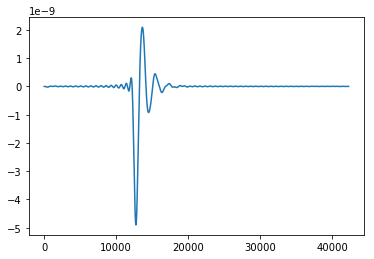

In [6]:
plt.plot(z1_m)

## Continuum simulations with the method of dimensionality reduction by Popov and Hess

In [ ]:
MDR_jit = jit()(MDR_SLS_sinc)

dmax = 5.0e-9
Ndy = 1000
dt = period3/1.0e4
printstep = period3/1.0e2

for i in range(len(Gg_v)):
    for j in range(len(tau_v)):
        #Transfering to SLS-Maxwell configuration for the MDR algorithm
        Ge = 1.0/(Je[i])
        G = J/(Jg[i]*Je[i]) 
        Gg = (G+Ge)
        tau_m = tau_v[j]*(Ge/Gg)          
        G_mpa = G/1.0e6
        Ge_mpa = Ge/1.0e6
        tau_us = tau_m*1.0e6
        print('G: %.3f MPa, Ge: %.3f MPa, tau: %.5f us'%(G_mpa, Ge_mpa, tau_us))
        %time t_m, tip_m, Fts_m, ca_m, sample_m, Fsinc_m, z1_m, z2_m, z3_m = MDR_jit(A, to, BW, G, tau_m, R, dt, startprint, simultime, fo1, k_m1, zb, printstep, Ge, Q1, Q2, Q3, nu, Ndy,dmax)
        np.savetxt('Continuum_Gg%d_tau%d.txt'%(i+1,j+1), np.array((t_m-to, Fts_m, Fsinc_m, z1_m, z2_m, z3_m)).T, header = 'time(s)\tFts(N)\tSinc_Force(N)\tz1(m)\tz2(m)\tz3(m)', delimiter = '\t')
        print('Continuum_Gg%d_tau%d.txt'%(i+1,j+1))